In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


## To achieve:

1. Understand the problem
2. Univariable study. We'll just focus on the dependent variable ('Price') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.



In [2]:
trainingData = pd.read_excel('./Data_Train.xlsx')

In [3]:
trainingData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
print('Rows: ', trainingData.shape[0])
print('Columns: ', trainingData.shape[1])
print(trainingData.describe())

Rows:  6019
Columns:  13
              Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000


### Columns

In [5]:
print(trainingData.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [6]:
trainingData['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

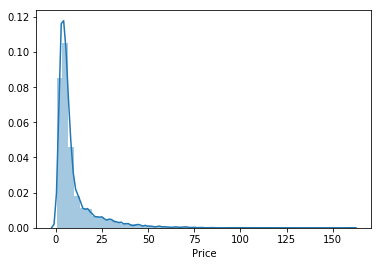

In [7]:
# Histogram
sns.distplot(trainingData['Price'])

In [8]:
# Skewness and Kurtosis
print(trainingData['Price'].skew())
print(trainingData['Price'].kurt())

3.3352319876668415
17.09220197043644


## Data Cleaning and dropping useless values

In [9]:
trainingData.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
print(trainingData.Location.unique())
print(trainingData.Fuel_Type.unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [11]:
print(trainingData.Transmission.unique())
print(trainingData.Owner_Type.unique())

['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [12]:
# Some problem with Seats and unwanted values
print(trainingData.Seats.unique())

print(trainingData.Year.unique())

[ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]
[2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]


### Still having confusion with New Price Dataframe, dont know how to use it


## Removing strings from Mileage, Engine and Power

In [13]:
# Power Column
trainingData['Power'] = trainingData['Power'].str.replace(' bhp','')
trainingData['Power'] = trainingData['Power'].convert_objects(convert_numeric = True)

In [14]:
# Engine
trainingData['Engine'] = trainingData['Engine'].str.replace(' CC','')
trainingData['Engine'] = trainingData['Engine'].convert_objects(convert_numeric = True)

In [15]:
# Mileage
trainingData['Mileage'] = trainingData['Mileage'].str.replace(' kmpl','')
trainingData['Mileage'] = trainingData['Mileage'].str.replace(' km/kg','')
trainingData['Mileage'] = trainingData['Mileage'].convert_objects(convert_numeric = True)

In [16]:
# New_Price
trainingData['New_Price'] = trainingData['New_Price'].str.replace(' Lakh','')
trainingData['New_Price'] = trainingData['New_Price'].convert_objects(convert_numeric = True)

In [17]:
trainingData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## Cleaning data from duplicates, NaNs and selecting reasonable ranges for columns



In [18]:
# If car was too old we should remove
print("Too new: %d" % trainingData.loc[trainingData.Year >= 2017].count()['Name'])
print("Too old: %d" % trainingData.loc[trainingData.Year < 1950].count()['Name'])


Too new: 987
Too old: 0


In [31]:
print(trainingData.Price.max())
print(trainingData.Price.min())

# Too expensive or too cheap?
print("Too expensive: %d" % trainingData.loc[trainingData.Price >= 150].count()['Name'])
print("Too cheap: %d" % trainingData.loc[trainingData.Price < 0.5].count()['Name'])

160.0
0.44
Too expensive: 1
Too cheap: 4


In [47]:
print(trainingData.Kilometers_Driven.min())
print(trainingData.Kilometers_Driven.max())
# Kilometres driven excess or very less
print("Too many KM: %d" % trainingData.loc[trainingData.Kilometers_Driven >= 900000].count()['Name'])
print("Too few KM: %d" % trainingData.loc[trainingData.Kilometers_Driven < 1000].count()['Name'])

171
6500000
Too many KM: 1
Too few KM: 2


In [61]:
print(trainingData.Power.min())
print(trainingData.Power.max())
print(trainingData[trainingData.Power < 35])


34.2
560.0
                             Name    Location  Year  Kilometers_Driven  \
790       Maruti Omni E 8 Str STD   Hyderabad  2013              26875   
1008  Maruti Omni E MPI STD BS IV       Kochi  2019              11571   
1912  Maruti Omni E MPI STD BS IV      Mumbai  2013              11734   
2196     Maruti Omni MPI STD BSIV  Coimbatore  2017              15473   
2849   Maruti Omni MPI CARGO BSIV     Kolkata  2015              23000   
3091  Maruti Omni E MPI STD BS IV      Jaipur  2015              15000   
3321     Maruti Omni MPI STD BSIV      Jaipur  2012             126000   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  \
790     Petrol       Manual      First     16.8   796.0   34.2    8.0   
1008    Petrol       Manual      First     16.8   796.0   34.2    8.0   
1912    Petrol       Manual      First     16.8   796.0   34.2    8.0   
2196    Petrol       Manual      First     16.8   796.0   34.2    5.0   
2849    Petrol       Manual    

In [28]:
checkModel = trainingData.drop_duplicates()
checkModel.shape

In [46]:
# Removing the outliers
# 1. 3 outliers in Kilometres_Driven (6500000, 171, 600)
# 2. 

                                            Name   Location  Year  \
173             Hyundai Grand i10 1.2 Kappa Asta    Kolkata  2019   
1161                 Tata Tigor 1.2 Revotron XTA  Ahmedabad  2018   
1198           Volkswagen Polo 1.0 MPI Trendline  Hyderabad  2019   
1242              Jaguar XE 2.0L Diesel Prestige      Delhi  2018   
1361               Maruti Alto 800 2016-2019 VXI     Mumbai  2019   
1598                        Tata Xenon XT EX 4X2     Jaipur  2017   
2054                      Maruti Ignis 1.2 Alpha     Mumbai  2017   
2646  Ford Figo 2015-2019 1.2P Sports Edition MT     Mumbai  2019   
5339      Hyundai i20 Active SX Dual Tone Petrol       Pune  2019   
5606                  Maruti Wagon R ZXI AMT 1.2     Mumbai  2019   
5941                            Renault KWID RXL       Pune  2018   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
173                1000    Petrol       Manual      First    18.90  1197.0   
1161           

## Relationship with numerical variables

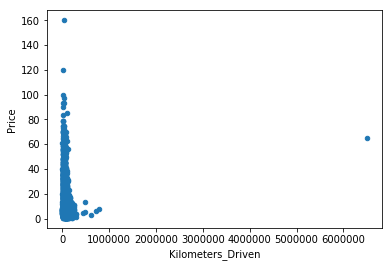

In [21]:
# Scatter Plot of Kilometers_Driven/Price
data = pd.concat([trainingData['Kilometers_Driven'], trainingData['Price']], axis=1)
data.plot.scatter(x='Kilometers_Driven', y='Price')

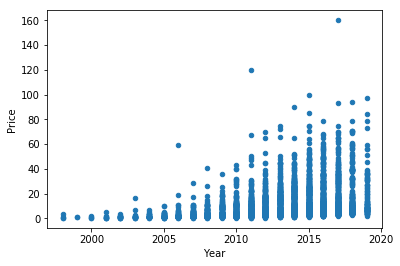

In [22]:
# Scatter Plot of Year/Price
data = pd.concat([trainingData['Year'], trainingData['Price']], axis=1)
data.plot.scatter(x='Year', y='Price')

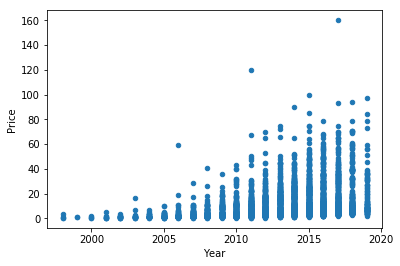

In [23]:
# Scatter Plot of Year/Price
data = pd.concat([trainingData['Year'], trainingData['Price']], axis=1)
data.plot.scatter(x='Year', y='Price')